In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation_1.csv')

In [46]:
df.shape

(3548, 18)

In [47]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,gls avenue 51,sector 92,0.45,6000.0,3,3,1,10.0,Relatively New,833.0,0,0,0,0,0,0,0
1,flat,godrej,sector 79,2.01,8495.0,3,4,3+,6.0,Relatively New,2141.0,0,1,0,0,0,0,158
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4,5,3+,7.0,Relatively New,3925.0,1,1,1,0,0,1,158
3,flat,godrej aria,sector 79,1.10,7774.0,2,2,3+,4.0,New Property,1223.0,0,0,0,0,0,1,49
4,flat,emaar digihomes,sector 62,2.15,14257.0,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101


In [48]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [49]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 92,0.45,3,3,1,10.0,Relatively New,833.0,0,0,0,0,0,0,0
1,flat,sector 79,2.01,3,4,3+,6.0,Relatively New,2141.0,0,1,0,0,0,0,158
2,flat,sector 62,7.15,4,5,3+,7.0,Relatively New,3925.0,1,1,1,0,0,1,158
3,flat,sector 79,1.10,2,2,3+,4.0,New Property,1223.0,0,0,0,0,0,1,49
4,flat,sector 62,2.15,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101


### luxury score

# problem is this that we are making predictive model so we ask users some input like what is your price for flat or how much bedroom you want , or bathroom,sector , floor num etc
# but there is luxury score column in our data so how we ask user to input luxury score in model becuase user do not know what is luxury score so to solve this problem we have to make 3 category of luxury score 1.budget, 2.semi_luxury ,3.luxury

<Axes: xlabel='luxury_score'>

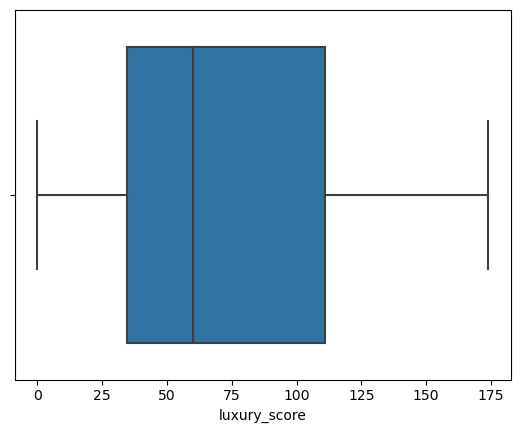

In [50]:
sns.boxplot(x=df['luxury_score'])

In [51]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [52]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [53]:
train_df

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 92,0.45,3,3,1,10.0,Relatively New,833.0,0,0,0,0,0,0,0,Low
1,flat,sector 79,2.01,3,4,3+,6.0,Relatively New,2141.0,0,1,0,0,0,0,158,High
2,flat,sector 62,7.15,4,5,3+,7.0,Relatively New,3925.0,1,1,1,0,0,1,158,High
3,flat,sector 79,1.10,2,2,3+,4.0,New Property,1223.0,0,0,0,0,0,1,49,Low
4,flat,sector 62,2.15,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,flat,sector 79,1.70,3,4,3+,6.0,New Property,1659.0,0,1,0,0,0,0,81,Medium
3544,flat,sector 104,4.45,4,5,3+,27.0,Relatively New,7222.0,0,0,0,0,0,0,110,Medium
3545,house,sector 56,8.00,10,10,3+,4.0,Relatively New,8286.0,1,1,0,1,0,2,107,Medium
3546,flat,sohna road,1.01,2,2,3,12.0,Under Construction,1184.0,1,0,0,0,0,0,80,Medium


### floorNum

<Axes: xlabel='floorNum'>

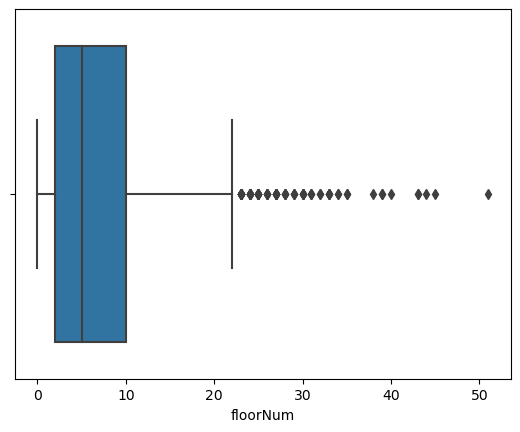

In [54]:
sns.boxplot(x=df['floorNum'])

In [55]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [56]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [57]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 92,0.45,3,3,1,10.0,Relatively New,833.0,0,0,0,0,0,0,0,Low,Mid Floor
1,flat,sector 79,2.01,3,4,3+,6.0,Relatively New,2141.0,0,1,0,0,0,0,158,High,Mid Floor
2,flat,sector 62,7.15,4,5,3+,7.0,Relatively New,3925.0,1,1,1,0,0,1,158,High,Mid Floor
3,flat,sector 79,1.10,2,2,3+,4.0,New Property,1223.0,0,0,0,0,0,1,49,Low,Mid Floor
4,flat,sector 62,2.15,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101,Medium,High Floor


In [58]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [59]:
train_df

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 92,0.45,3,3,1,Relatively New,833.0,0,0,0,0,0,0,Low,Mid Floor
1,flat,sector 79,2.01,3,4,3+,Relatively New,2141.0,0,1,0,0,0,0,High,Mid Floor
2,flat,sector 62,7.15,4,5,3+,Relatively New,3925.0,1,1,1,0,0,1,High,Mid Floor
3,flat,sector 79,1.10,2,2,3+,New Property,1223.0,0,0,0,0,0,1,Low,Mid Floor
4,flat,sector 62,2.15,2,2,3,Under Construction,1676.0,0,0,0,0,0,0,Medium,High Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,flat,sector 79,1.70,3,4,3+,New Property,1659.0,0,1,0,0,0,0,Medium,Mid Floor
3544,flat,sector 104,4.45,4,5,3+,Relatively New,7222.0,0,0,0,0,0,0,Medium,High Floor
3545,house,sector 56,8.00,10,10,3+,Relatively New,8286.0,1,1,0,1,0,2,Medium,Mid Floor
3546,flat,sohna road,1.01,2,2,3,Under Construction,1184.0,1,0,0,0,0,0,Medium,High Floor


In [60]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [61]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,107.0,3,3,1.0,3.0,833.0,0,0,0,0,0,0,1.0,2.0
1,0.0,91.0,3,4,4.0,3.0,2141.0,0,1,0,0,0,0,0.0,2.0
2,0.0,72.0,4,5,4.0,3.0,3925.0,1,1,1,0,0,1,0.0,2.0
3,0.0,91.0,2,2,4.0,1.0,1223.0,0,0,0,0,0,1,1.0,2.0
4,0.0,72.0,2,2,3.0,4.0,1676.0,0,0,0,0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.0,91.0,3,4,4.0,1.0,1659.0,0,1,0,0,0,0,2.0,2.0
3544,0.0,8.0,4,5,4.0,3.0,7222.0,0,0,0,0,0,0,2.0,0.0
3545,1.0,65.0,10,10,4.0,3.0,8286.0,1,1,0,1,0,2,2.0,2.0
3546,0.0,113.0,2,2,3.0,4.0,1184.0,1,0,0,0,0,0,2.0,0.0


In [62]:
y_label

0       0.45
1       2.01
2       7.15
3       1.10
4       2.15
        ... 
3543    1.70
3544    4.45
3545    8.00
3546    1.01
3547    3.80
Name: price, Length: 3548, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

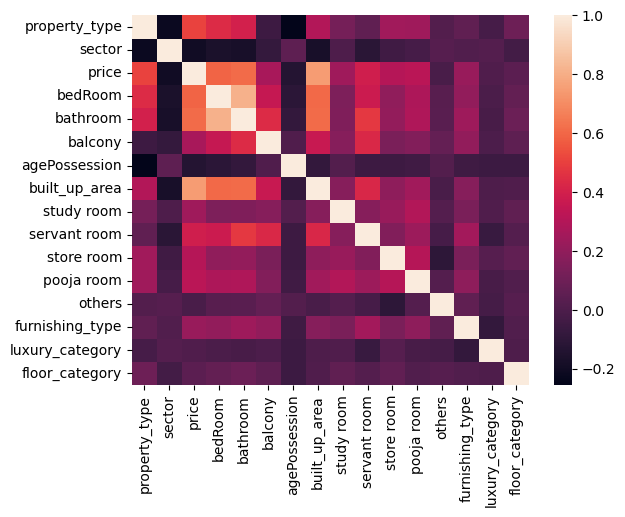

In [63]:
 sns.heatmap(data_label_encoded.corr())

In [64]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.198650
1,price,1.000000
2,bedRoom,0.592081
3,bathroom,0.610622
4,balcony,0.269224
5,agePossession,-0.134937
6,built_up_area,0.748561
7,study room,0.242818
8,servant room,0.391638
9,store room,0.305530


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.648036
0,property_type,0.105216
1,sector,0.103693
2,bedRoom,0.025026
3,bathroom,0.024294
8,servant room,0.022216
5,agePossession,0.013582
4,balcony,0.012331
12,furnishing_type,0.010651
7,study room,0.008828


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.682407
1,sector,0.099842
0,property_type,0.097561
2,bedRoom,0.037457
3,bathroom,0.037314
8,servant room,0.022782
9,store room,0.008924
5,agePossession,0.004869
7,study room,0.002614
12,furnishing_type,0.002122


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.675592
0,property_type,0.167910
1,sector,0.124395
8,servant room,0.015368
2,bedRoom,0.011831
3,bathroom,0.008638
5,agePossession,0.004540
12,furnishing_type,0.001795
7,study room,0.001087
4,balcony,0.000280


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.508210
0,property_type,0.720117
3,bathroom,0.276844
9,store room,0.199168
7,study room,0.170927
8,servant room,0.162170
12,furnishing_type,0.161005
10,pooja room,0.072707
13,luxury_category,0.054466
2,bedRoom,0.015721


### Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.648656
1,sector,0.103544
0,property_type,0.099276
3,bathroom,0.026404
2,bedRoom,0.026108
8,servant room,0.019327
5,agePossession,0.014019
4,balcony,0.012738
12,furnishing_type,0.010545
7,study room,0.010169


### Technique 7 - Linear Regression Weights

In [36]:
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.510494
0,property_type,0.718055
3,bathroom,0.284187
9,store room,0.203755
7,study room,0.179334
8,servant room,0.170887
12,furnishing_type,0.169947
10,pooja room,0.075821
13,luxury_category,0.065382
2,bedRoom,0.018274


In [39]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [41]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.198650,0.103693,0.099842,0.124395,-0.049520,0.103544,-0.058634
bedRoom,0.592081,0.025026,0.037457,0.011831,0.015721,0.026108,0.018274
bathroom,0.610622,0.024294,0.037314,0.008638,0.276844,0.026404,0.284187
balcony,0.269224,0.012331,0.002074,0.000280,-0.042545,0.012738,-0.065294
agePossession,-0.134937,0.013582,0.004869,0.004540,-0.000000,0.014019,-0.006301
built_up_area,0.748561,0.648036,0.682407,0.675592,1.508210,0.648656,1.510494
study room,0.242818,0.008828,0.002614,0.001087,0.170927,0.010169,0.179334
servant room,0.391638,0.022216,0.022782,0.015368,0.162170,0.019327,0.170887
store room,0.305530,0.005965,0.008924,-0.001131,0.199168,0.007504,0.203755


In [42]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [44]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.751494
sector             0.122444
bedRoom            0.028141
bathroom           0.027028
servant room       0.022463
agePossession      0.010388
balcony            0.007639
furnishing_type    0.007025
study room         0.006337
store room         0.005884
luxury_category    0.003691
floor_category     0.003143
pooja room         0.002705
others             0.001617
dtype: float64

In [45]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,107.0,3,3,1.0,3.0,833.0,0,0,0,0,0,0,1.0,2.0
1,0.0,91.0,3,4,4.0,3.0,2141.0,0,1,0,0,0,0,0.0,2.0
2,0.0,72.0,4,5,4.0,3.0,3925.0,1,1,1,0,0,1,0.0,2.0
3,0.0,91.0,2,2,4.0,1.0,1223.0,0,0,0,0,0,1,1.0,2.0
4,0.0,72.0,2,2,3.0,4.0,1676.0,0,0,0,0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.0,91.0,3,4,4.0,1.0,1659.0,0,1,0,0,0,0,2.0,2.0
3544,0.0,8.0,4,5,4.0,3.0,7222.0,0,0,0,0,0,0,2.0,0.0
3545,1.0,65.0,10,10,4.0,3.0,8286.0,1,1,0,1,0,2,2.0,2.0
3546,0.0,113.0,2,2,3.0,4.0,1184.0,1,0,0,0,0,0,2.0,0.0


In [46]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [47]:
scores.mean()

0.8036941020167145

In [48]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [49]:
scores.mean()

0.8008247789946712

In [50]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [51]:
export_df.to_csv('gurgaon_properties_post_feature_selection_1.csv', index=False)

In [42]:
feature_df=train_df[['property_type','sector','price','bedRoom','bathroom','balcony','agePossession','built_up_area','servant room','store room','furnishing_type','luxury_category','floor_category']]

In [ ]:
feature_df.to_csv('gurgaon_properties_post_feature_selection_v2_1.csv', index=False)